# Preço de combustíveis
## Análise Exploratória de Dados e Predições em Séries Temporais

##### Datasets disponíveis em:
https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil/data e

https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas

##### Inicialmente, será avaliada a evolução mensal do preço do produto gasolina em um gráfico de linha, gerado através das bibliotecas Matplotlib, Seaborn e Plotly.

/tmp/ipykernel_70554/2948451911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gasolina['DATA INICIAL'] = pd.to_datetime(df_gasolina['DATA INICIAL'])
/tmp/ipykernel_70554/2948451911.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gasolina['DATA FINAL'] = pd.to_datetime(df_gasolina['DATA FINAL'])


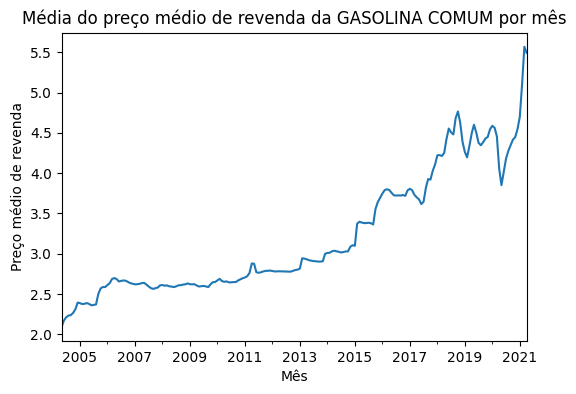

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo TSV em um Pandas Dataframe
df = pd.read_csv('2004-2021.tsv', sep='\t')

# Filtrar as observações referentes ao produto "GASOLINA COMUM"
df_gasolina = df.query('PRODUTO == "GASOLINA COMUM"')

# Converter as colunas de data para o tipo datetime
df_gasolina['DATA INICIAL'] = pd.to_datetime(df_gasolina['DATA INICIAL'])
df_gasolina['DATA FINAL'] = pd.to_datetime(df_gasolina['DATA FINAL'])

# Agrupar os dados por mês e calcular a média do preço médio de revenda
df_gasolina_mes = df_gasolina.groupby(pd.Grouper(key='DATA INICIAL', freq='M'))['PREÇO MÉDIO REVENDA'].mean()

# Preencher valores nulos com média entre os valores anterior e posterior
df_gasolina_mes = df_gasolina_mes.interpolate()

# Plotar o gráfico de linha utilizando Matplotlib
df_gasolina_mes.plot(kind='line', figsize=(6, 4))
plt.title('Média do preço médio de revenda da GASOLINA COMUM por mês')
plt.xlabel('Mês')
plt.ylabel('Preço médio de revenda')
plt.show()

In [2]:
# Transformando o objeto df_gasolina_mes em um objeto DataFrame
df_gasolina_mes = df_gasolina_mes.to_frame()

In [3]:
# Vizualizando o objeto df_gasolina_mes
df_gasolina_mes

PREÇO MÉDIO REVENDA
DATA INICIAL                     
2004-05-31               2.092528
2004-06-30               2.169759
2004-07-31               2.210519
2004-08-31               2.231126
2004-09-30               2.236583
...                           ...
2020-12-31               4.544787
2021-01-31               4.696081
2021-02-28               5.099731
2021-03-31               5.568963
2021-04-30               5.493102

[204 rows x 1 columns]

In [4]:
# Resetando o índice e renomeando as colunas
df_gasolina_mes = df_gasolina_mes.reset_index()
df_gasolina_mes = df_gasolina_mes.rename(columns={"DATA INICIAL": "Meses"})
df_gasolina_mes = df_gasolina_mes.rename(columns={"PREÇO MÉDIO REVENDA": "Preço Original"})

In [5]:
# Vizualizando novamente o objeto, após as modificações
df_gasolina_mes

Meses  Preço Original
0   2004-05-31        2.092528
1   2004-06-30        2.169759
2   2004-07-31        2.210519
3   2004-08-31        2.231126
4   2004-09-30        2.236583
..         ...             ...
199 2020-12-31        4.544787
200 2021-01-31        4.696081
201 2021-02-28        5.099731
202 2021-03-31        5.568963
203 2021-04-30        5.493102

[204 rows x 2 columns]

In [6]:
# Convertendo a coluna 'Meses' para o tipo datetime
df_gasolina_mes['Meses'] = pd.to_datetime(df_gasolina_mes['Meses'])

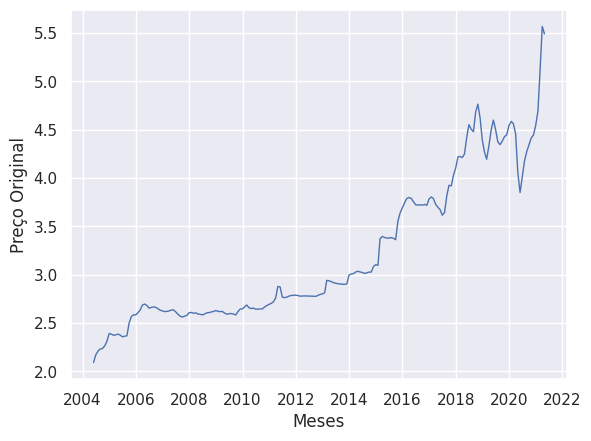

In [7]:
# Plotar o gráfico de linha, utilizando Seaborn
import seaborn as sns
sns.set(style="darkgrid")

sns.lineplot(data=df_gasolina_mes, x='Meses', y='Preço Original', linewidth=1)

plt.show()

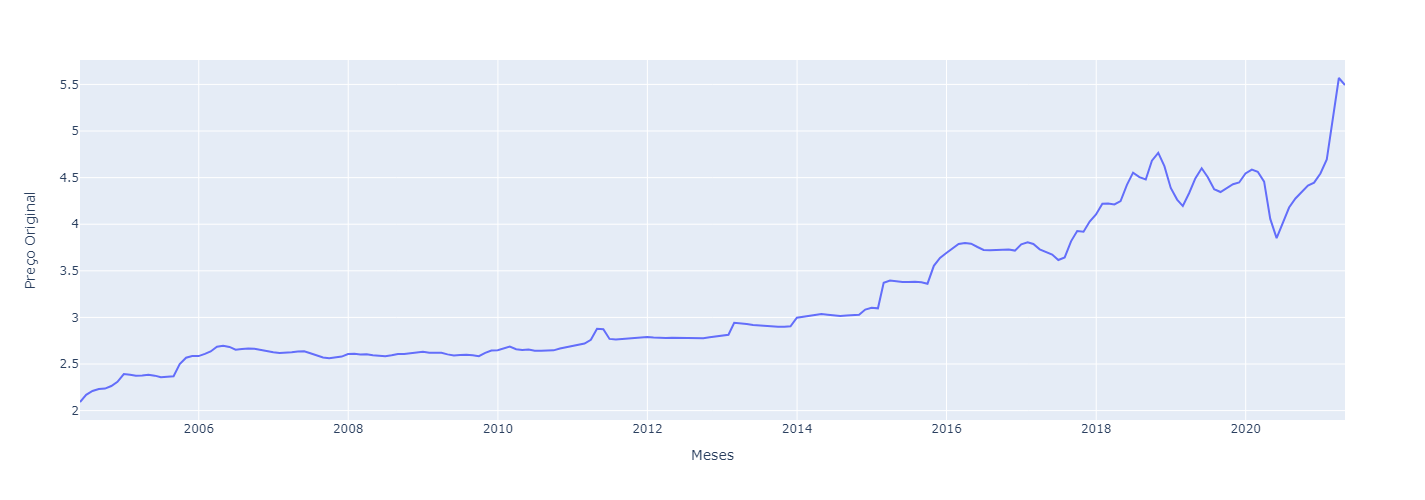

In [8]:
# Plotando os dados de forma identica com o Plotly
import plotly.express as px
px.line(df_gasolina_mes, x='Meses', y='Preço Original', width=700, height=500)

##### Podemos notar que o gráfico gerado pela biblioteca Plotly é mais interativo que os gerados pela Matplotlib e Seaborn, uma vez que permite dar zoom em áreas específicas, mostra o rótulo de uma observação específica quando passa o mouse, tem a opção de download da imagem, entre outras ferramentas de visualização.

##### Ainda utilizando a Plotly, podemos gerar um gráfico em linha com a evolução dos preços para todos os produtos para o estado de São Paulo, por exemplo (excetuando o GLP, por apresentar valores muito elevados). Neste caso, cada produto corresponde a uma série do gráfico e é representado por uma cor diferente.

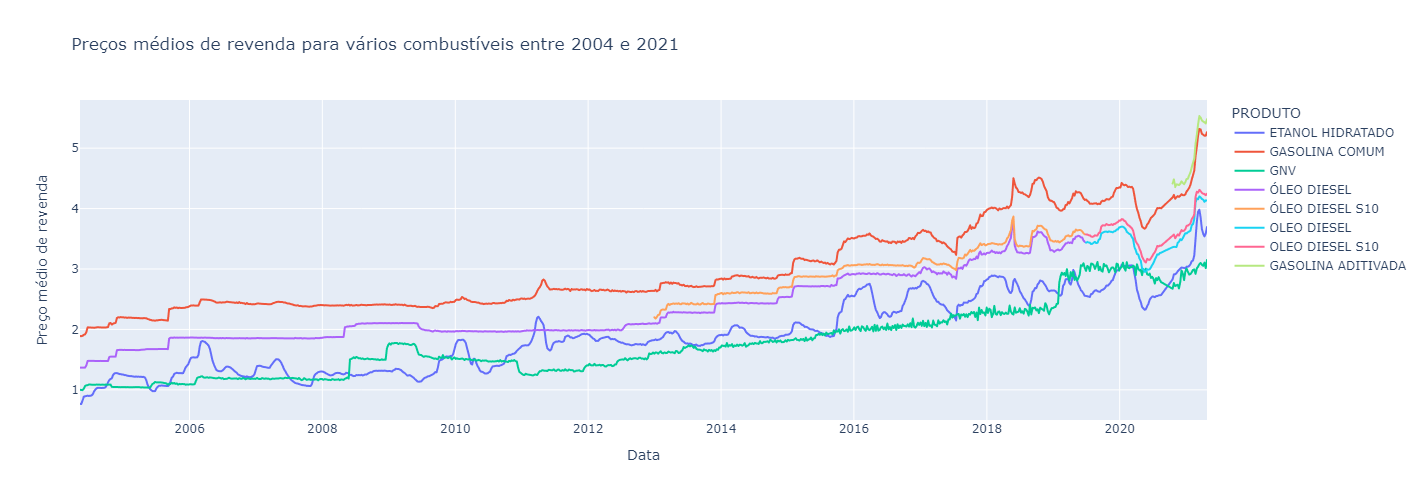

In [9]:
# Gráfico em linha com a evolução dos preços para todos os produtos para o estado de São Paulo, excetuando o GLP
px.line(
    df.query('ESTADO == "SAO PAULO" and PRODUTO != "GLP"'),
    x='DATA INICIAL',
    y='PREÇO MÉDIO REVENDA',
    color='PRODUTO',
    labels={'DATA INICIAL':'Data', 'PREÇO MÉDIO REVENDA':'Preço médio de revenda'},
    title='Preços médios de revenda para vários combustíveis entre 2004 e 2021', width=900, height=500
)

Especificamente para o produto gasolina, avalia-se 

##### Na sequência, vamos importar um arquivo CSV com valores da inflação medida pelo IPCA, obtidos da página do IBGE: https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas
##### Através de um editor de textos simples, os valores correspondentes aos meses foram traduzidos para o inglês.

In [10]:
import pandas as pd

# Ler o arquivo CSV de inflação
df_inflacao = pd.read_csv('inflacao_english_new.csv', sep=';')

print(df_inflacao.head())

   jul/1994  aug/1994  sep/1994  oct/1994  nov/1994  dec/1994  jan/1995  \
0      6.84      1.86      1.53      2.62      2.81      1.71       1.7   

   feb/1995  mar/1995  apr/1995  ...  dec/2022  jan/2023  feb/2023  mar/2023  \
0      1.02      1.55      2.43  ...      0.62      0.53      0.84      0.71   

   apr/2023  may/2023  jun/2023  jul/2023  aug/2023  sep/2023  
0      0.61      0.23     -0.08      0.12      0.23      0.26  

[1 rows x 351 columns]


##### Note que todos os meses estão em uma mesma linha, enquanto todos os valores são apresentados na linha de baixo. O Dataframe será transposto para que os meses sejam listados em uma coluna e os valores em outra coluna adjacente.

In [11]:
# Transpor o DataFrame
df_inflacao_transposto = df_inflacao.transpose()

In [12]:
df_inflacao_transposto

0
jul/1994  6.84
aug/1994  1.86
sep/1994  1.53
oct/1994  2.62
nov/1994  2.81
...        ...
may/2023  0.23
jun/2023 -0.08
jul/2023  0.12
aug/2023  0.23
sep/2023  0.26

[351 rows x 1 columns]

In [13]:
# Resetando o index e renomeando as colunas
df_inflacao_transposto = df_inflacao_transposto.rename(columns={df_inflacao_transposto.columns[0]: "Inflação"})
df_inflacao_transposto = df_inflacao_transposto.reset_index()
df_inflacao_transposto = df_inflacao_transposto.rename(columns={"index": "Meses"})

In [14]:
df_inflacao_transposto

Meses  Inflação
0    jul/1994      6.84
1    aug/1994      1.86
2    sep/1994      1.53
3    oct/1994      2.62
4    nov/1994      2.81
..        ...       ...
346  may/2023      0.23
347  jun/2023     -0.08
348  jul/2023      0.12
349  aug/2023      0.23
350  sep/2023      0.26

[351 rows x 2 columns]

In [15]:
# Converter a coluna "Meses" do segundo dataframe para o formato de data
df_inflacao_transposto['Meses'] = pd.to_datetime(df_inflacao_transposto['Meses'], format='%b/%Y')

In [16]:
df_inflacao_transposto

Meses  Inflação
0   1994-07-01      6.84
1   1994-08-01      1.86
2   1994-09-01      1.53
3   1994-10-01      2.62
4   1994-11-01      2.81
..         ...       ...
346 2023-05-01      0.23
347 2023-06-01     -0.08
348 2023-07-01      0.12
349 2023-08-01      0.23
350 2023-09-01      0.26

[351 rows x 2 columns]

In [17]:
# Converter os valores de data do primeiro dataframe para o mesmo dia do mês do segundo dataframe
df_gasolina_mes['Meses'] = pd.to_datetime(df_gasolina_mes['Meses'], format='%Y-%m').dt.to_period('M').dt.to_timestamp()

In [18]:
df_gasolina_mes

Meses  Preço Original
0   2004-05-01        2.092528
1   2004-06-01        2.169759
2   2004-07-01        2.210519
3   2004-08-01        2.231126
4   2004-09-01        2.236583
..         ...             ...
199 2020-12-01        4.544787
200 2021-01-01        4.696081
201 2021-02-01        5.099731
202 2021-03-01        5.568963
203 2021-04-01        5.493102

[204 rows x 2 columns]

In [19]:
# Fazer o merge dos dataframes
df_gasolina_inflacao = pd.merge(df_gasolina_mes, df_inflacao_transposto, on='Meses')

In [20]:
# Exibir o dataframe resultante
print(df_gasolina_inflacao)

         Meses  Preço Original  Inflação
0   2004-05-01        2.092528      0.51
1   2004-06-01        2.169759      0.71
2   2004-07-01        2.210519      0.91
3   2004-08-01        2.231126      0.69
4   2004-09-01        2.236583      0.33
..         ...             ...       ...
199 2020-12-01        4.544787      1.35
200 2021-01-01        4.696081      0.25
201 2021-02-01        5.099731      0.86
202 2021-03-01        5.568963      0.93
203 2021-04-01        5.493102      0.31

[204 rows x 3 columns]


In [21]:
# Dividir a coluna de taxa de inflação por 100
df_gasolina_inflacao['Inflação'] = df_gasolina_inflacao['Inflação'] / 100

In [22]:
# Calcular a taxa de inflação acumulada
df_gasolina_inflacao['Inflação Acumulada'] = (1 + df_gasolina_inflacao['Inflação'][::-1]).cumprod()[::-1] - 1

In [23]:
# Criar a nova coluna com os preços corrigidos
df_gasolina_inflacao['Preço Corrigido'] = df_gasolina_inflacao['Preço Original'] * (1 + df_gasolina_inflacao['Inflação Acumulada'])

In [24]:
# Exibir o DataFrame resultante
print(df_gasolina_inflacao)

         Meses  Preço Original  Inflação  Inflação Acumulada  Preço Corrigido
0   2004-05-01        2.092528    0.0051            1.497595         5.226286
1   2004-06-01        2.169759    0.0071            1.484922         5.391682
2   2004-07-01        2.210519    0.0091            1.467403         5.454240
3   2004-08-01        2.231126    0.0069            1.445152         5.455442
4   2004-09-01        2.236583    0.0033            1.428396         5.431310
..         ...             ...       ...                 ...              ...
199 2020-12-01        4.544787    0.0135            0.037508         4.715255
200 2021-01-01        4.696081    0.0025            0.023689         4.807325
201 2021-02-01        5.099731    0.0086            0.021136         5.207518
202 2021-03-01        5.568963    0.0093            0.012429         5.638179
203 2021-04-01        5.493102    0.0031            0.003100         5.510130

[204 rows x 5 columns]


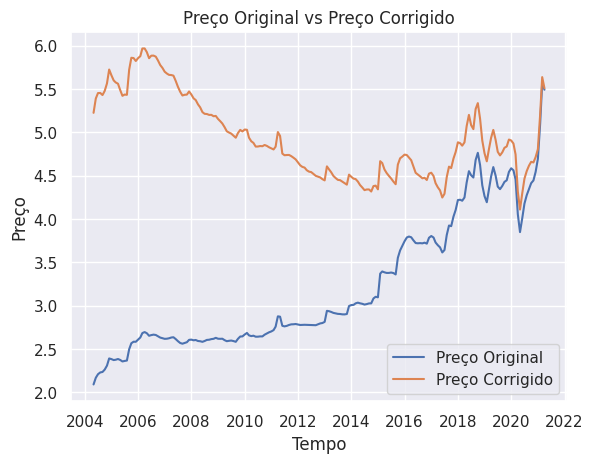

In [25]:
# Plotar o gráfico em linha com as séries "Preço Original" e "Preço Corrigido" usando o Matplotlib
plt.plot(df_gasolina_inflacao['Meses'], df_gasolina_inflacao['Preço Original'], label='Preço Original')
plt.plot(df_gasolina_inflacao['Meses'], df_gasolina_inflacao['Preço Corrigido'], label='Preço Corrigido')

plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.title('Preço Original vs Preço Corrigido')
plt.legend()

plt.show()

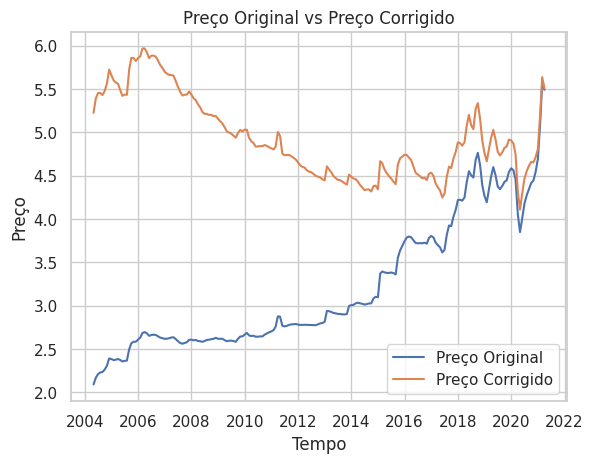

In [26]:
# Plotar o mesmo gráfico utilizando Seaborn

# Definindo o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de linha
sns.lineplot(data=df_gasolina_inflacao, x='Meses', y='Preço Original', label='Preço Original')
sns.lineplot(data=df_gasolina_inflacao, x='Meses', y='Preço Corrigido', label='Preço Corrigido')

# Definindo o título e os rótulos dos eixos
plt.title('Preço Original vs Preço Corrigido')
plt.xlabel('Tempo')
plt.ylabel('Preço')

# Exibindo o gráfico
plt.show()

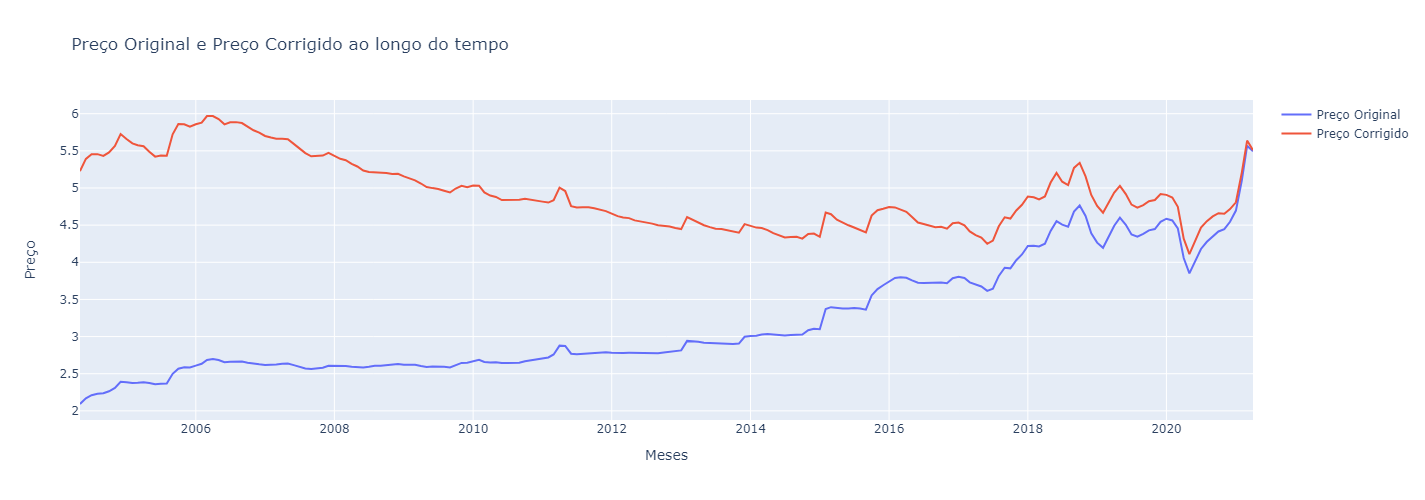

In [27]:
# Plotar o mesmo gráfico utilizando Plotly

import plotly.graph_objects as go

# Criando as linhas do gráfico
linha1 = go.Scatter(x=df_gasolina_inflacao['Meses'], y=df_gasolina_inflacao['Preço Original'], mode='lines', name='Preço Original')
linha2 = go.Scatter(x=df_gasolina_inflacao['Meses'], y=df_gasolina_inflacao['Preço Corrigido'], mode='lines', name='Preço Corrigido')

# Definindo os dados
data = [linha1, linha2]

# Definindo o layout do gráfico
layout = go.Layout(title='Preço Original e Preço Corrigido ao longo do tempo',
                   xaxis=dict(title='Meses'),
                   yaxis=dict(title='Preço'),
                   width=800,  # Largura do gráfico em pixels
                   height=500  # Altura do gráfico em pixels
                   )

# Criando a figura e plotando o gráfico
fig = go.Figure(data=data, layout=layout)
fig.show()

In [53]:
df_gasolina

DATA INICIAL DATA FINAL        REGIÃO              ESTADO  \
12064    2004-05-09 2004-05-15  CENTRO OESTE    DISTRITO FEDERAL   
12065    2004-05-09 2004-05-15  CENTRO OESTE               GOIAS   
12066    2004-05-09 2004-05-15  CENTRO OESTE         MATO GROSSO   
12067    2004-05-09 2004-05-15  CENTRO OESTE  MATO GROSSO DO SUL   
12068    2004-05-09 2004-05-15      NORDESTE             ALAGOAS   
...             ...        ...           ...                 ...   
120721   2021-04-25 2021-05-01         NORTE             RORAIMA   
120722   2021-04-25 2021-05-01           SUL      SANTA CATARINA   
120723   2021-04-25 2021-05-01       SUDESTE           SAO PAULO   
120724   2021-04-25 2021-05-01      NORDESTE             SERGIPE   
120725   2021-04-25 2021-05-01         NORTE           TOCANTINS   

               PRODUTO  NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  \
12064   GASOLINA COMUM                           128              R$/l   
12065   GASOLINA COMUM                           395              R$/l   
12066   GASOLINA COMUM                           194              R$/l   
12067   GASOLINA COMUM                           166              R$/l   
12068   GASOLINA COMUM                           106              R$/l   
...                ...                           ...               ...   
120721  GASOLINA COMUM                            12              R$/l   
120722  GASOLINA COMUM                           119              R$/l   
120723  GASOLINA COMUM                          1187              R$/l   
120724  GASOLINA COMUM                            34              R$/l   
120725  GASOLINA COMUM                            20              R$/l   

        PREÇO MÉDIO REVENDA  DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
12064                 2.029                  0.007                 1.990   
12065                 2.025                  0.062                 1.850   
12066                 2.358                  0.066                 2.000   
12067                 2.120                  0.075                 1.970   
12068                 2.090                  0.034                 2.000   
...                     ...                    ...                   ...   
120721                5.364                  0.065                 5.310   
120722                5.051                  0.251                 4.640   
120723                5.265                  0.218                 4.279   
120724                5.586                  0.088                 5.410   
120725                5.751                  0.160                 5.578   

        PREÇO MÁXIMO REVENDA MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
12064                  2.070                0.318                     0.003   
12065                  2.220                0.296                     0.031   
12066                  2.540                0.472                     0.028   
12067                  2.440                0.325                     0.035   
12068                  2.159                 0.35                     0.016   
...                      ...                  ...                       ...   
120721                 5.530             -99999.0                     0.012   
120722                 5.599             -99999.0                     0.050   
120723                 6.099             -99999.0                     0.041   
120724                 5.699             -99999.0                     0.016   
120725                 6.119             -99999.0                     0.028   

       PREÇO MÉDIO DISTRIBUIÇÃO DESVIO PADRÃO DISTRIBUIÇÃO  \
12064                     1.711                       0.02   
12065                     1.729                      0.036   
12066                     1.886                      0.068   
12067                     1.795                      0.033   
12068                      1.74                      0.042   
...                         ...                        ...   
12072

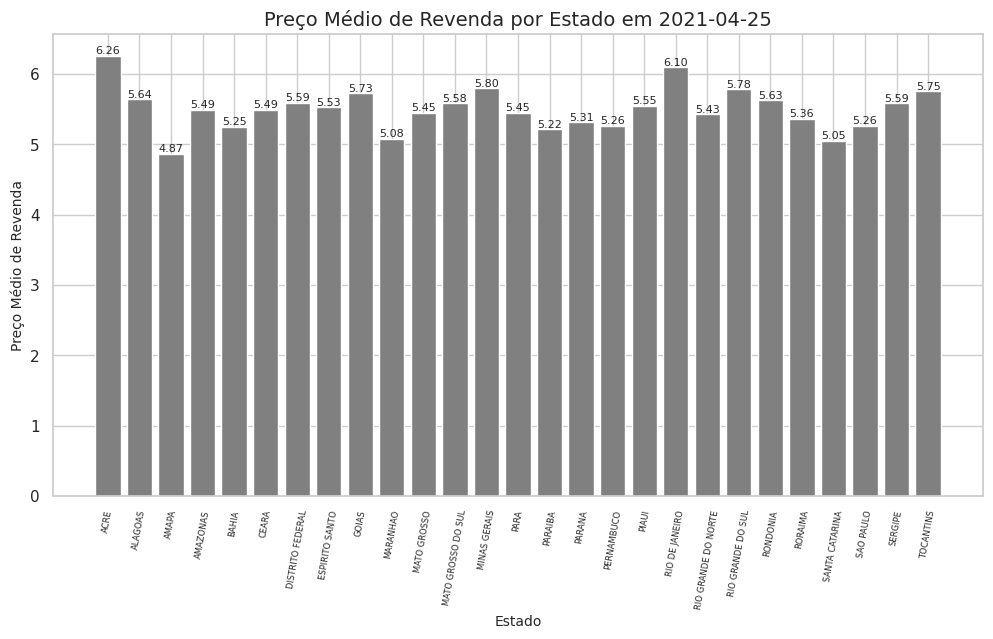

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame chamado df_gasolina com as colunas 'DATA INICIAL', 'ESTADO' e 'PREÇO MÉDIO REVENDA'

# Filtrando o DataFrame para a data específica
data_especifica = '2021-04-25'
df_filtrado = df_gasolina[df_gasolina['DATA INICIAL'] == data_especifica]

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
barras = plt.bar(df_filtrado['ESTADO'], df_filtrado['PREÇO MÉDIO REVENDA'], color='gray')

# Definindo o título e os rótulos dos eixos
plt.title(f'Preço Médio de Revenda por Estado em {data_especifica}', fontsize=14)
plt.xlabel('Estado', fontsize=10)
plt.ylabel('Preço Médio de Revenda', fontsize=10)

# Rotacionando os rótulos do eixo x e diminuindo o tamanho da fonte
plt.xticks(rotation=80, fontsize=6)

# Adicionando rótulos com os valores de 'PREÇO MÉDIO REVENDA' em cima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:.2f}', ha='center', va='bottom', fontsize=8)

# Exibindo o gráfico de barras
plt.show()

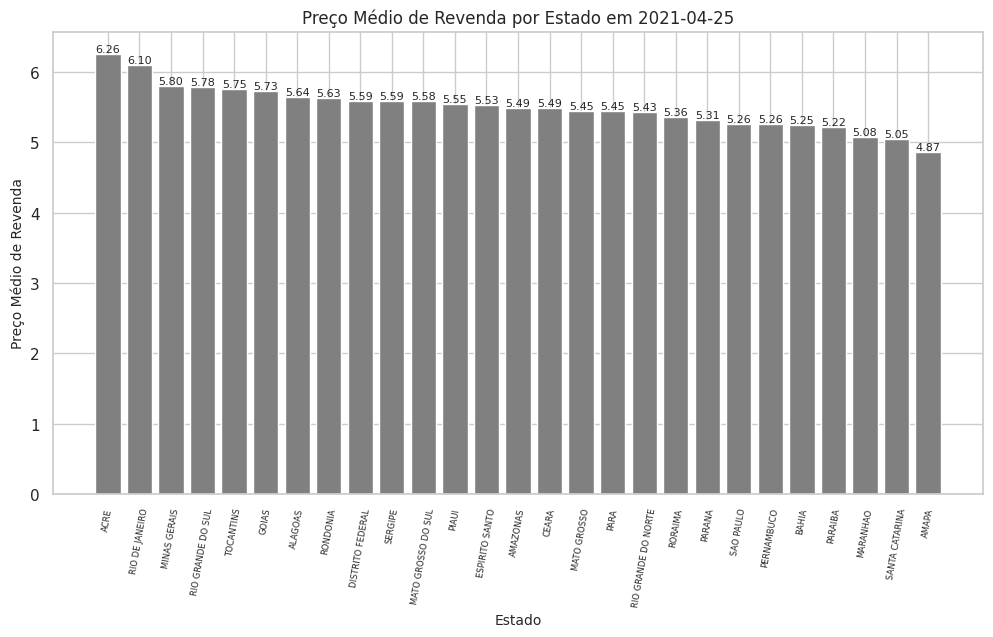

In [29]:
# Filtrando o DataFrame para a data específica
data_especifica = '2021-04-25'
df_filtrado = df_gasolina[df_gasolina['DATA INICIAL'] == data_especifica]

# Ordenando o DataFrame pelos valores de 'PREÇO MÉDIO REVENDA' em ordem decrescente
df_filtrado = df_filtrado.sort_values('PREÇO MÉDIO REVENDA', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
barras = plt.bar(df_filtrado['ESTADO'], df_filtrado['PREÇO MÉDIO REVENDA'], color='gray')

# Definindo o título e os rótulos dos eixos
plt.title(f'Preço Médio de Revenda por Estado em {data_especifica}')
plt.xlabel('Estado', fontsize=10)
plt.ylabel('Preço Médio de Revenda', fontsize=10)

# Rotacionando os rótulos do eixo x e diminuindo o tamanho da fonte
plt.xticks(rotation=80, fontsize=6)

# Adicionando rótulos com os valores de 'PREÇO MÉDIO REVENDA' em cima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:.2f}', ha='center', va='bottom', fontsize=8)

# Exibindo o gráfico de barras
plt.show()

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Supondo que você já tenha um dataframe chamado df_gasolina_inflacao com as colunas 'Meses', 'Preço Original' e 'Preço Corrigido'

# Definindo as séries temporais
serie_original = df_gasolina_inflacao['Preço Original']
serie_corrigida = df_gasolina_inflacao['Preço Corrigido']

# Separando os dados de treinamento (anteriores a janeiro de 2021) e dados de teste (janeiro a abril de 2021)
dados_treinamento_original = serie_original[:-4]
dados_teste_original = serie_original[-4:]
dados_treinamento_corrigida = serie_corrigida[:-4]
dados_teste_corrigida = serie_corrigida[-4:]

# Definindo o modelo ARIMA
modelo_original = ARIMA(dados_treinamento_original, order=(1, 1, 1))
modelo_corrigido = ARIMA(dados_treinamento_corrigida, order=(1, 1, 1))

# Treinando o modelo ARIMA
modelo_original_treinado = modelo_original.fit()
modelo_corrigido_treinado = modelo_corrigido.fit()

# Realizando as previsões
previsao_original = modelo_original_treinado.predict(start=len(dados_treinamento_original), end=len(dados_treinamento_original)+3)
previsao_corrigida = modelo_corrigido_treinado.predict(start=len(dados_treinamento_corrigida), end=len(dados_treinamento_corrigida)+3)

# Comparando com os valores reais
mse_original = mean_squared_error(dados_teste_original, previsao_original)
mse_corrigida = mean_squared_error(dados_teste_corrigida, previsao_corrigida)

# Exibindo a comparação e as métricas de avaliação
print("Valores reais (Original):", dados_teste_original.tolist())
print("Valores previstos (Original):", previsao_original.tolist())
print("MSE (Original):", mse_original)
print("---")
print("Valores reais (Corrigida):", dados_teste_corrigida.tolist())
print("Valores previstos (Corrigida):", previsao_corrigida.tolist())
print("MSE (Corrigida):", mse_corrigida)

Valores reais (Original): [4.696081481481482, 5.099731481481481, 5.568962962962963, 5.4931018518518515]
Valores previstos (Original): [4.601526094389011, 4.608201334224785, 4.608986663219391, 4.609079055649468]
MSE (Original): 0.4883983517913092
---
Valores reais (Corrigida): [4.807324876425659, 5.2075179676336125, 5.638178656905927, 5.510130467592592]
Valores previstos (Corrigida): [4.749094212368853, 4.748674479021715, 4.748679685216893, 4.748679620641447]
MSE (Corrigida): 0.3962359925591247


In [31]:
# Ajustando o formato das datas nas previsões para o primeiro dia de cada mês
datas_previsao = pd.date_range(start='2021-01-01', periods=len(previsao_original), freq='MS')

In [32]:
previsao_original

200    4.601526
201    4.608201
202    4.608987
203    4.609079
Name: predicted_mean, dtype: float64

In [33]:
previsao_corrigida

200    4.749094
201    4.748674
202    4.748680
203    4.748680
Name: predicted_mean, dtype: float64

In [34]:
datas_previsao

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01'], dtype='datetime64[ns]', freq='MS')

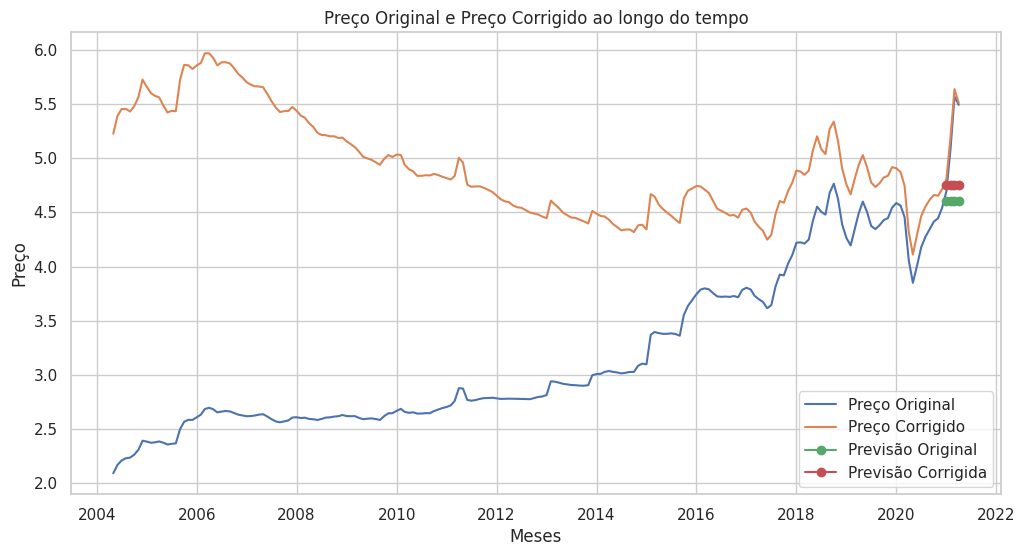

In [35]:
# Plotando as séries temporais e as previsões
plt.figure(figsize=(12, 6))
plt.plot(df_gasolina_inflacao['Meses'], df_gasolina_inflacao['Preço Original'], label='Preço Original')
plt.plot(df_gasolina_inflacao['Meses'], df_gasolina_inflacao['Preço Corrigido'], label='Preço Corrigido')
plt.plot(datas_previsao, previsao_original, 'o-', label='Previsão Original')
plt.plot(datas_previsao, previsao_corrigida, 'o-', label='Previsão Corrigida')

# Definindo o título e os rótulos dos eixos
plt.title('Preço Original e Preço Corrigido ao longo do tempo')
plt.xlabel('Meses')
plt.ylabel('Preço')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

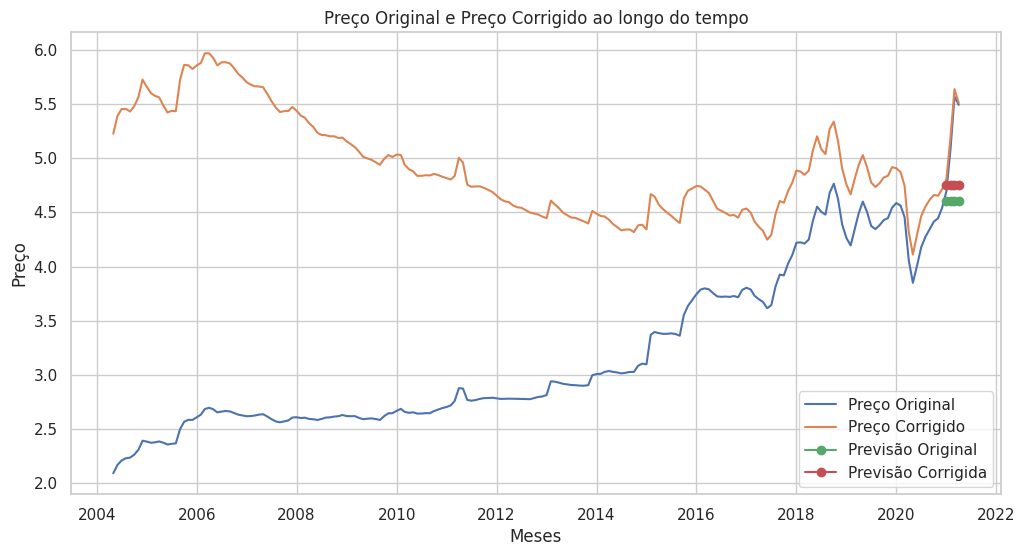

In [36]:
# Plotando as séries temporais e as previsões
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gasolina_inflacao, x='Meses', y='Preço Original', label='Preço Original')
sns.lineplot(data=df_gasolina_inflacao, x='Meses', y='Preço Corrigido', label='Preço Corrigido')
plt.plot(datas_previsao, previsao_original, 'o-', label='Previsão Original')
plt.plot(datas_previsao, previsao_corrigida, 'o-', label='Previsão Corrigida')

# Definindo o título e os rótulos dos eixos
plt.title('Preço Original e Preço Corrigido ao longo do tempo')
plt.xlabel('Meses')
plt.ylabel('Preço')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

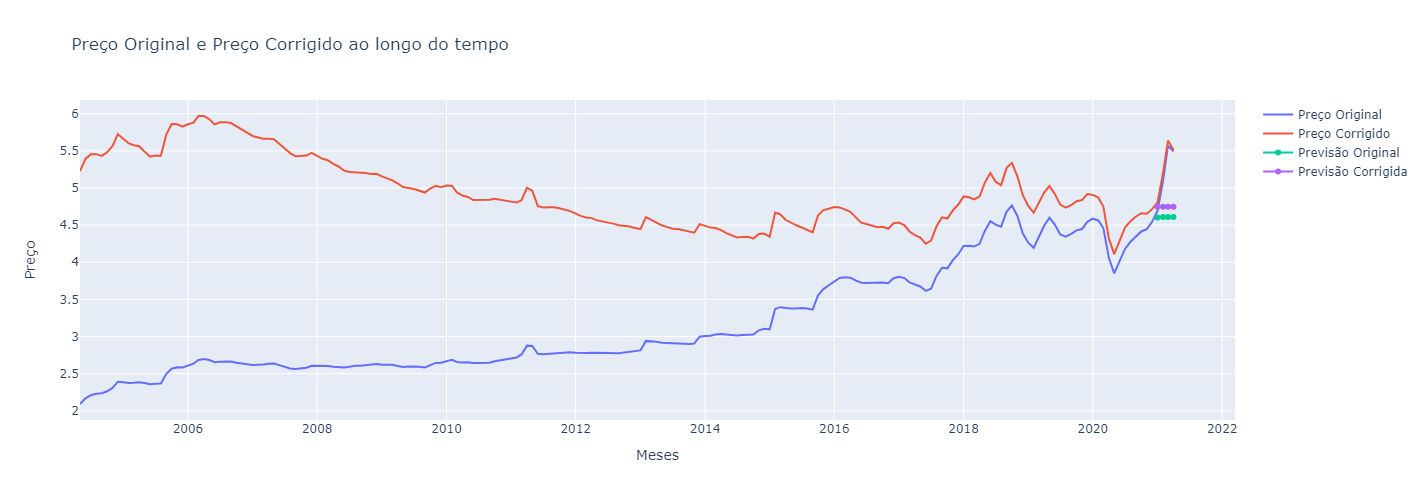

In [37]:
# Criando o gráfico de Preço Original
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_gasolina_inflacao['Meses'], y=df_gasolina_inflacao['Preço Original'], mode='lines', name='Preço Original'))

# Criando o gráfico de Preço Corrigido
fig.add_trace(go.Scatter(x=df_gasolina_inflacao['Meses'], y=df_gasolina_inflacao['Preço Corrigido'], mode='lines', name='Preço Corrigido'))

# Adicionando os pontos e as linhas das previsões do Preço Original
fig.add_trace(go.Scatter(x=datas_previsao, y=previsao_original, mode='markers+lines', name='Previsão Original'))

# Adicionando os pontos e as linhas das previsões do Preço Corrigido
fig.add_trace(go.Scatter(x=datas_previsao, y=previsao_corrigida, mode='markers+lines', name='Previsão Corrigida'))

# Definindo o layout do gráfico
fig.update_layout(title='Preço Original e Preço Corrigido ao longo do tempo',
                  xaxis=dict(title='Meses'),
                  yaxis=dict(title='Preço'),
                   width=800,  # Largura do gráfico em pixels
                   height=500  # Altura do gráfico em pixels
                   )

# Exibindo o gráfico
fig.show()

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Supondo que você já tenha um dataframe chamado df_gasolina_inflacao com as colunas 'Meses', 'Preço Original' e 'Preço Corrigido'

# Ajustando o formato das datas
df_gasolina_inflacao['Meses'] = pd.to_datetime(df_gasolina_inflacao['Meses'])

# Definindo as séries temporais
serie_original = df_gasolina_inflacao.set_index('Meses')['Preço Original']
serie_corrigida = df_gasolina_inflacao.set_index('Meses')['Preço Corrigido']

# Separando os dados de treinamento e teste
dados_treinamento_original = serie_original[:-5]
dados_teste_original = serie_original[-5:]
dados_treinamento_corrigida = serie_corrigida[:-5]
dados_teste_corrigida = serie_corrigida[-5:]

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
dados_treinamento_original_norm = scaler.fit_transform(dados_treinamento_original.values.reshape(-1, 1))
dados_teste_original_norm = scaler.transform(dados_teste_original.values.reshape(-1, 1))
dados_treinamento_corrigida_norm = scaler.fit_transform(dados_treinamento_corrigida.values.reshape(-1, 1))
dados_teste_corrigida_norm = scaler.transform(dados_teste_corrigida.values.reshape(-1, 1))

# Função para criar os dados de treinamento em formato de série temporal
def criar_dados_temporais(dados, janela_temporal):
    X, y = [], []
    for i in range(len(dados)-janela_temporal):
        X.append(dados[i:(i+janela_temporal), 0])
        y.append(dados[i+janela_temporal, 0])
    return np.array(X), np.array(y)

# Definindo a janela temporal
janela_temporal = 1

# Criando os dados de treinamento em formato de série temporal
X_treinamento_original, y_treinamento_original = criar_dados_temporais(dados_treinamento_original_norm, janela_temporal)
X_teste_original, y_teste_original = criar_dados_temporais(dados_teste_original_norm, janela_temporal)
X_treinamento_corrigida, y_treinamento_corrigida = criar_dados_temporais(dados_treinamento_corrigida_norm, janela_temporal)
X_teste_corrigida, y_teste_corrigida = criar_dados_temporais(dados_teste_corrigida_norm, janela_temporal)

# Reshape dos dados de entrada para o formato [amostras, tempo, características]
X_treinamento_original = np.reshape(X_treinamento_original, (X_treinamento_original.shape[0], X_treinamento_original.shape[1], 1))
X_teste_original = np.reshape(X_teste_original, (X_teste_original.shape[0], X_teste_original.shape[1], 1))
X_treinamento_corrigida = np.reshape(X_treinamento_corrigida, (X_treinamento_corrigida.shape[0], X_treinamento_corrigida.shape[1], 1))
X_teste_corrigida = np.reshape(X_teste_corrigida, (X_teste_corrigida.shape[0], X_teste_corrigida.shape[1], 1))

# Criando o modelo LSTM para o Preço Original
modelo_original = Sequential()
modelo_original.add(LSTM(units=50, activation='relu', input_shape=(janela_temporal, 1)))
modelo_original.add(Dense(units=1))
modelo_original.compile(optimizer='adam', loss='mean_squared_error')
modelo_original.fit(X_treinamento_original, y_treinamento_original, epochs=100, batch_size=32)

# Criando o modelo LSTM para o Preço Corrigido
modelo_corrigida = Sequential()
modelo_corrigida.add(LSTM(units=50, activation='relu', input_shape=(janela_temporal, 1)))
modelo_corrigida.add(Dense(units=1))
modelo_corrigida.compile(optimizer='adam', loss='mean_squared_error')
modelo_corrigida.fit(X_treinamento_corrigida, y_treinamento_corrigida, epochs=100, batch_size=32)

# Realizando as previsões
previsao_original_norm = modelo_original.predict(X_teste_original)
previsao_corrigida_norm = modelo_corrigida.predict(X_teste_corrigida)

# Invertendo a normalização das previsões
previsao_original = scaler.inverse_transform(previsao_original_norm)
previsao_corrigida = scaler.inverse_transform(previsao_corrigida_norm)

# Comparando com os valores reais
mse_original = mean_squared_error(y_teste_original, previsao_original)
mse_corrigida = mean_squared_error(y_teste_corrigida, previsao_corrigida)

# Exibindo a comparação e as métricas de avaliação
print("Valores reais (Original):", y_teste_original.tolist())
print("Valores previstos (Original):", previsao_original_norm.squeeze().tolist())
print("MSE (Original):", mse_original)
print("---")
print("Valores reais (Corrigida):", y_teste_corrigida.tolist())
print("Valores previstos (Corrigida):", previsao_corrigida_norm.squeeze().tolist())
print("MSE (Corrigida):", mse_corrigida)

2023-11-14 16:55:13.827575: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/100
7/7 [==============================] - 1s 5ms/step - loss: 0.2367
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2208
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2050
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1912
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1647
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1525
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1409
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1296
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1191
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1082
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0984
Epoch 13/100
7/7 [==============================] - 0s 2ms/st

In [39]:
# Ajustando o formato das datas nas previsões para o primeiro dia de cada mês
datas_previsao = pd.date_range(start='2021-01-01', periods=len(previsao_original), freq='MS')

In [40]:
datas_previsao

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01'], dtype='datetime64[ns]', freq='MS')

In [41]:
previsao_original

array([[5.858382 ],
       [5.9878063],
       [6.3460226],
       [6.7884564]], dtype=float32)

In [42]:
previsao_corrigida

array([[4.7104225],
       [4.7909503],
       [5.166838 ],
       [5.618485 ]], dtype=float32)

In [43]:
# Convertendo as previsões em listas
previsao_original_list = previsao_original.tolist()
previsao_corrigida_list = previsao_corrigida.tolist()

In [44]:
previsao_original_list

[[5.858382225036621],
 [5.98780632019043],
 [6.346022605895996],
 [6.788456439971924]]

In [45]:
previsao_corrigida_list

[[4.710422515869141],
 [4.790950298309326],
 [5.1668381690979],
 [5.618484973907471]]

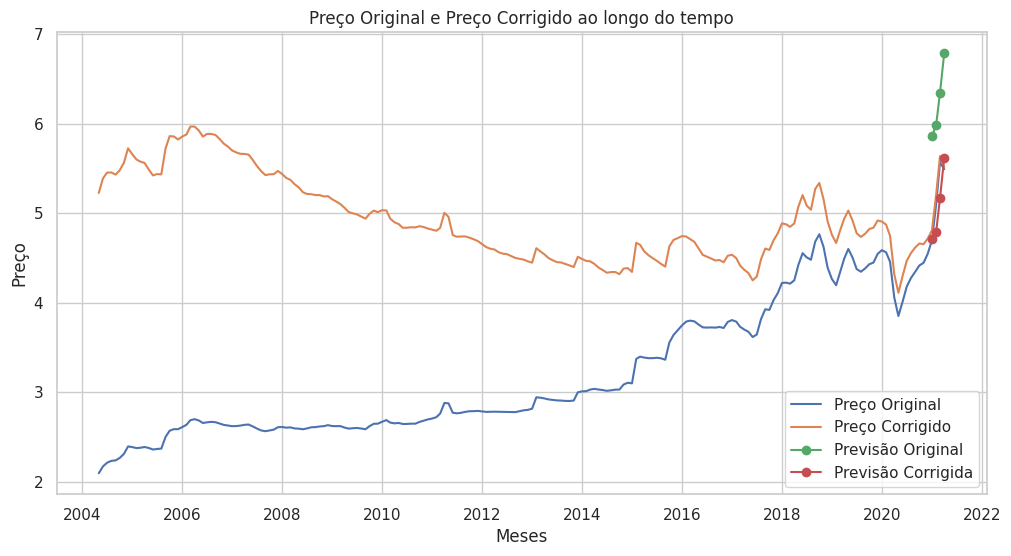

In [46]:
# Plotando as séries temporais e as previsões
plt.figure(figsize=(12, 6))
plt.plot(df_gasolina_inflacao['Meses'], df_gasolina_inflacao['Preço Original'], label='Preço Original')
plt.plot(df_gasolina_inflacao['Meses'], df_gasolina_inflacao['Preço Corrigido'], label='Preço Corrigido')
plt.plot(datas_previsao, previsao_original, 'o-', label='Previsão Original')
plt.plot(datas_previsao, previsao_corrigida, 'o-', label='Previsão Corrigida')

# Definindo o título e os rótulos dos eixos
plt.title('Preço Original e Preço Corrigido ao longo do tempo')
plt.xlabel('Meses')
plt.ylabel('Preço')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

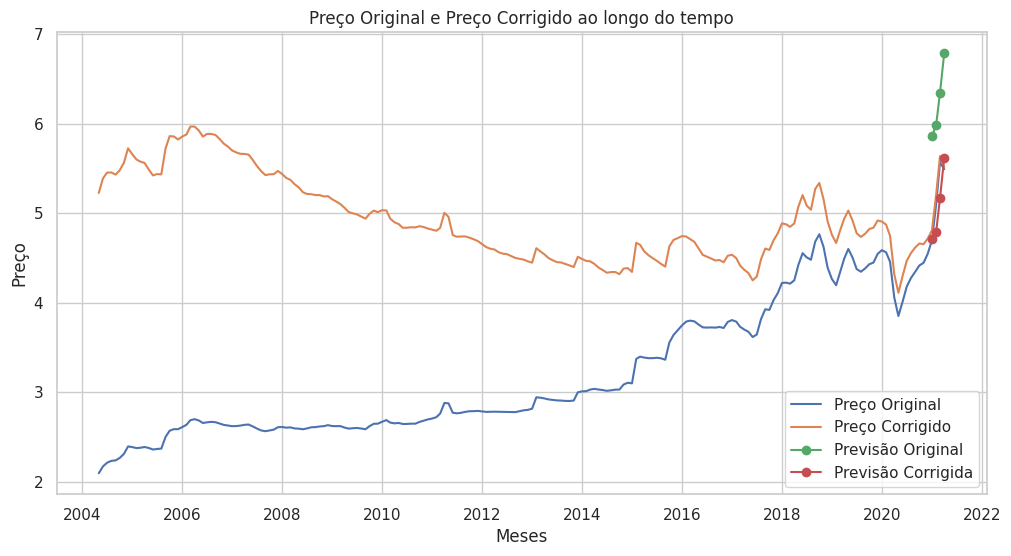

In [47]:
# Plotando as séries temporais e as previsões
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gasolina_inflacao, x='Meses', y='Preço Original', label='Preço Original')
sns.lineplot(data=df_gasolina_inflacao, x='Meses', y='Preço Corrigido', label='Preço Corrigido')
plt.plot(datas_previsao, previsao_original, 'o-', label='Previsão Original')
plt.plot(datas_previsao, previsao_corrigida, 'o-', label='Previsão Corrigida')

# Definindo o título e os rótulos dos eixos
plt.title('Preço Original e Preço Corrigido ao longo do tempo')
plt.xlabel('Meses')
plt.ylabel('Preço')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

In [48]:
# Alterando os objetos previsao_original e previsao_corrigida para utilizar a biblioteca Plotly

# usando Numpy
import numpy as np
previsao_original_new = np.array(previsao_original).squeeze(-1)
previsao_corrigida_new = np.array(previsao_corrigida).squeeze(-1)

# usando List Comprehension
#previsao_original_new = [i[0] for i in previsao_original_list]
#previsao_corrigida_new = [i[0] for i in previsao_original_list]

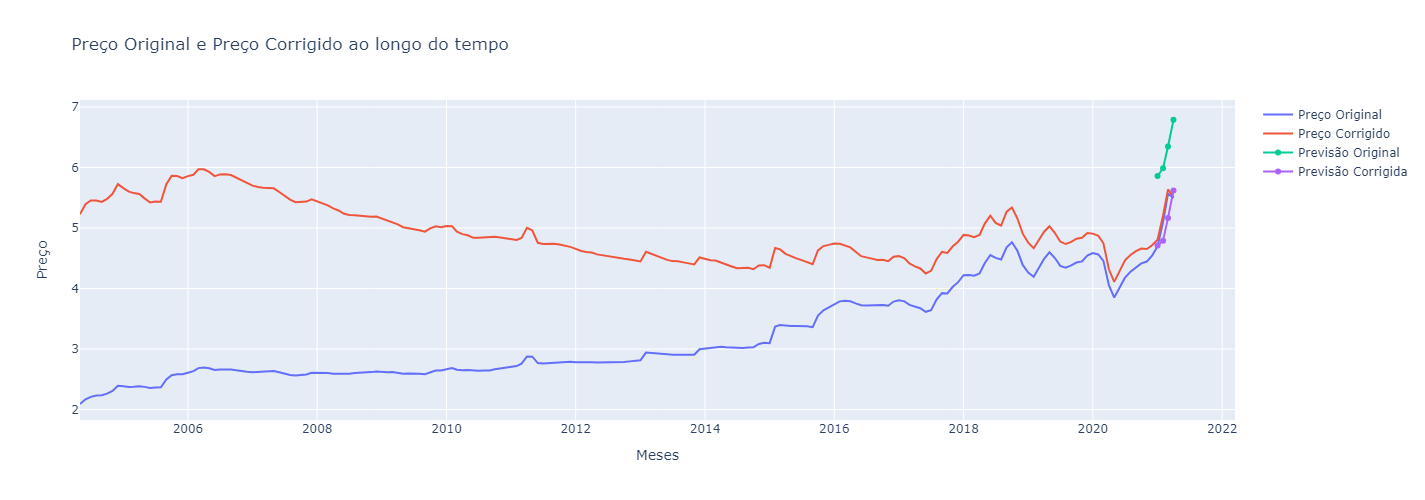

In [49]:
# Criando o gráfico de Preço Original
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_gasolina_inflacao['Meses'], y=df_gasolina_inflacao['Preço Original'], mode='lines', name='Preço Original'))

# Criando o gráfico de Preço Corrigido
fig.add_trace(go.Scatter(x=df_gasolina_inflacao['Meses'], y=df_gasolina_inflacao['Preço Corrigido'], mode='lines', name='Preço Corrigido'))

# Adicionando os pontos e as linhas das previsões do Preço Original
fig.add_trace(go.Scatter(x=datas_previsao, y=previsao_original_new, mode='markers+lines', name='Previsão Original'))

# Adicionando os pontos e as linhas das previsões do Preço Corrigido
fig.add_trace(go.Scatter(x=datas_previsao, y=previsao_corrigida_new, mode='markers+lines', name='Previsão Corrigida'))

# Definindo o layout do gráfico
fig.update_layout(title='Preço Original e Preço Corrigido ao longo do tempo',
                  xaxis=dict(title='Meses'),
                  yaxis=dict(title='Preço'),
                   width=800,  # Largura do gráfico em pixels
                   height=500  # Altura do gráfico em pixels
                   )

# Exibindo o gráfico
fig.show()